In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1 - Creation d'un tableau numpy a partir des données

In [2]:
data = pd.read_csv("data.csv")
data

,Unnamed: 0,Carac_1,Carac_2,Carac_3,Carac_4
0,0,19.095075,23.007964,-5.405356,18.914277
1,1,6.268670,22.538181,4.225849,4.903482
2,2,8.629340,5.099603,8.538627,18.708424
3,3,6.057592,4.091350,7.311689,15.761706
4,4,12.186323,18.526116,7.089289,10.960271
...,...,...,...,...,...
295,295,6.085806,13.324442,8.543791,10.260668
296,296,6.821122,26.387911,0.312335,3.693594
297,297,12.645463,10.219807,7.532918,17.019476
298,298,8.084045,14.473153,-5.045174,18.155108


In [3]:
del data["Unnamed: 0"]

In [4]:
X= data.to_numpy()
X.shape

(300, 4)

# 2 - afficher le scatter_matrix des données

j'ai opté pour la fonction pairplot de seaborn pour plus ergonomie

## Matrices de distribution

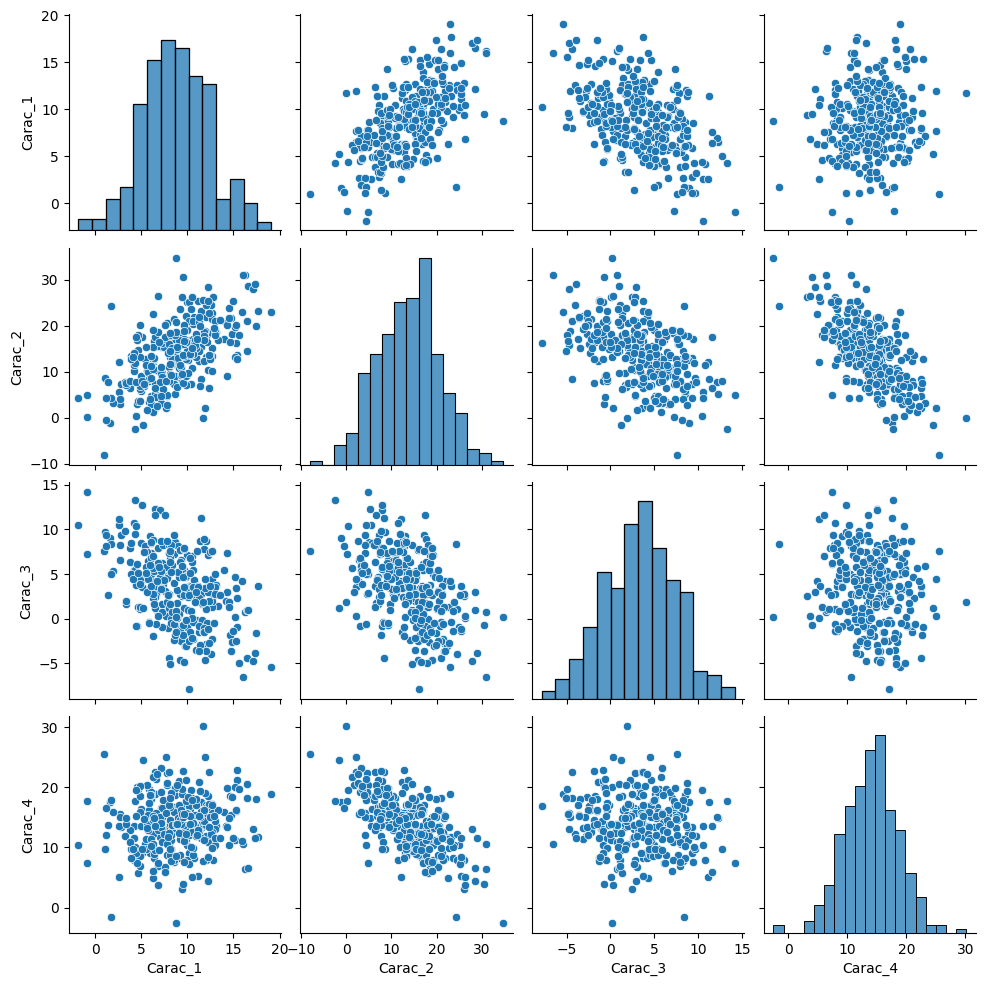

In [5]:
sns.pairplot(data)

# 3 - moyenne et variance des colonnes

In [6]:
mean = data.mean()
variance = data.var()

print("moyenne \n", mean)
print()
print("variance\n", variance)

moyenne 
 Carac_1     8.783984
Carac_2    13.864733
Carac_3     3.374047
Carac_4    13.957993
dtype: float64

variance
 Carac_1    13.620940
Carac_2    47.800352
Carac_3    16.434095
Carac_4    21.704749
dtype: float64


# 4 - matrice de covariance et de correlation

In [7]:
cov_matrice =  np.cov(X.T)
corr_matrice = np.corrcoef(X.T)

print("matrice de covariance \n", cov_matrice, sep="", end="\n"*2)

print("matrice de correlation \n", corr_matrice, sep="")

matrice de covariance 
[[ 13.62093952  15.02524551  -7.34487562   1.72771911]
 [ 15.02524551  47.80035205 -13.45901243 -21.62663919]
 [ -7.34487562 -13.45901243  16.43409543  -2.46983183]
 [  1.72771911 -21.62663919  -2.46983183  21.70474857]]

matrice de correlation 
[[ 1.          0.58884704 -0.49091693  0.10048291]
 [ 0.58884704  1.         -0.48020286 -0.67142283]
 [-0.49091693 -0.48020286  1.         -0.1307727 ]
 [ 0.10048291 -0.67142283 -0.1307727   1.        ]]


On remarque une assez bonne correlation en les variables variant de 0.48 à 0.58 en valeur absolu, horsmis la collone Carac_4 qui presente d'assez faible correlation avec carac_1 et carac3 : respectivement  0.1 et 0.13



# 5 - Transformation des données en effectifs centrées et reduits

In [8]:
data_centerd = data - mean

data_cr = data_centerd/np.sqrt(variance)

data_cr

,Carac_1,Carac_2,Carac_3,Carac_4
0,2.793837,1.322465,-2.165669,1.063846
1,-0.681536,1.254516,0.210119,-1.943514
2,-0.041901,-1.267777,1.273979,1.019661
3,-0.738728,-1.413609,0.971322,0.387160
4,0.921879,0.674216,0.916462,-0.643449
...,...,...,...,...
295,-0.731084,-0.078147,1.275253,-0.793616
296,-0.531847,1.811336,-0.755251,-2.203211
297,1.046285,-0.527197,1.025894,0.657135
298,-0.189652,0.088001,-2.076821,0.900894


# 6- Visualisation des nouvelles distributions

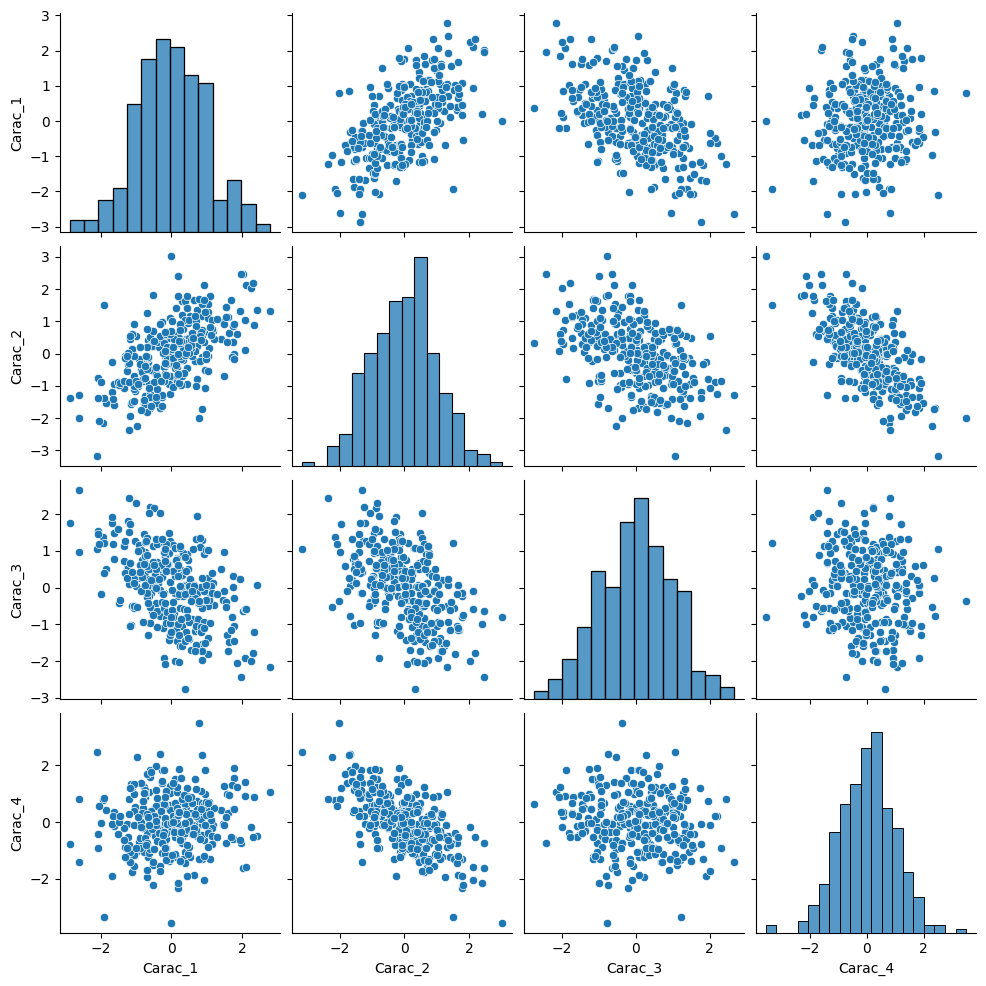

In [9]:
sns.pairplot(data_cr)

# 7 - Matrice de covariance et de correlation des données transformées

In [10]:
X_cr = data_cr.to_numpy()

cov_matrice_cr =  np.cov(X_cr.T)
corr_matrice_cr = np.corrcoef(X_cr.T)

print("matrice de covariance \n", cov_matrice, sep="", end="\n"*2)

print("matrice de correlation \n", corr_matrice_cr, sep="")

matrice de covariance 
[[ 13.62093952  15.02524551  -7.34487562   1.72771911]
 [ 15.02524551  47.80035205 -13.45901243 -21.62663919]
 [ -7.34487562 -13.45901243  16.43409543  -2.46983183]
 [  1.72771911 -21.62663919  -2.46983183  21.70474857]]

matrice de correlation 
[[ 1.          0.58884704 -0.49091693  0.10048291]
 [ 0.58884704  1.         -0.48020286 -0.67142283]
 [-0.49091693 -0.48020286  1.         -0.1307727 ]
 [ 0.10048291 -0.67142283 -0.1307727   1.        ]]


Nous remarquons que nous avons axactement des memes données

# 8 - Vecteur propres des données

In [11]:
val_p, vec_p = np.linalg.eig(corr_matrice_cr)
vec_p

array([[-0.5224063 , -0.36206924,  0.67760196,  0.36993663],
       [-0.64881643,  0.71076979,  0.02719112, -0.27037786],
       [ 0.47328978,  0.23962009,  0.72905329, -0.43250467],
       [ 0.28657579,  0.55343869,  0.09272279,  0.77651943]])

## Verification de la norme unitaire et de l'orthogonalité

Pour verifier qu'il sont de norme 1  on peut faire le produit scalaire

In [12]:
scalar_product = vec_p*vec_p
scalar_product = scalar_product.sum(axis=0)
scalar_product

array([1., 1., 1., 1.])

Pour verifier l'orthogonalité on peut fiat le produit vectorial entre la transpose et lui meme
Ansi sur la diagonal on aura la norme norme des vecteur propre (oh mince j'ai pas étè intelligentsur ce coup)
et pour les autres valeur on aura le produit scalire entre les vecteur propres qui vaudra 0 s'il sont prthogonaux

In [13]:
vec_p.T@vec_p

array([[ 1.00000000e+00,  1.94289029e-16, -1.42247325e-16,
         2.49800181e-16],
       [ 1.94289029e-16,  1.00000000e+00,  7.63278329e-17,
         3.33066907e-16],
       [-1.42247325e-16,  7.63278329e-17,  1.00000000e+00,
         9.71445147e-17],
       [ 2.49800181e-16,  3.33066907e-16,  9.71445147e-17,
         1.00000000e+00]])

I was right! 😎.

Sur la diagonal on a des 1 et ailleurs on des puissances de -16 et -17 sensiblement egales à 0

# 9- Projection des données dans la base des vecteurs propres

In [14]:
data_projected = data_cr@vec_p
X_projected = data_projected.to_numpy()
X_projected.shape

(300, 4)

In [15]:

cov_matrice_p =  np.cov(X_projected.T)
corr_matrice_p = np.corrcoef(X_projected.T)

print("matrice de covariance \n", cov_matrice_p, sep="", end="\n"*2)

print("matrice de correlation \n", corr_matrice_p, sep="")

matrice de covariance 
[[ 2.12097353e+00  1.49267443e-16 -1.10502466e-15  3.02990631e-16]
 [ 1.49267443e-16  1.53478223e-02 -3.11902121e-17  1.59849837e-16]
 [-1.10502466e-15 -3.11902121e-17  5.09186579e-01 -1.18819855e-17]
 [ 3.02990631e-16  1.59849837e-16 -1.18819855e-17  1.35449207e+00]]

matrice de correlation 
[[ 1.00000000e+00  8.27321079e-16 -1.06332462e-15  1.78761233e-16]
 [ 8.27321079e-16  1.00000000e+00 -3.52822662e-16  1.10866563e-15]
 [-1.06332462e-15 -3.52822662e-16  1.00000000e+00 -1.43074525e-17]
 [ 1.78761233e-16  1.10866563e-15 -1.43074525e-17  1.00000000e+00]]


On remarque que la correlation entre les variables sont quasiinuls, bon ils sont nuls.

# 3- Visualisation des données apres projection 

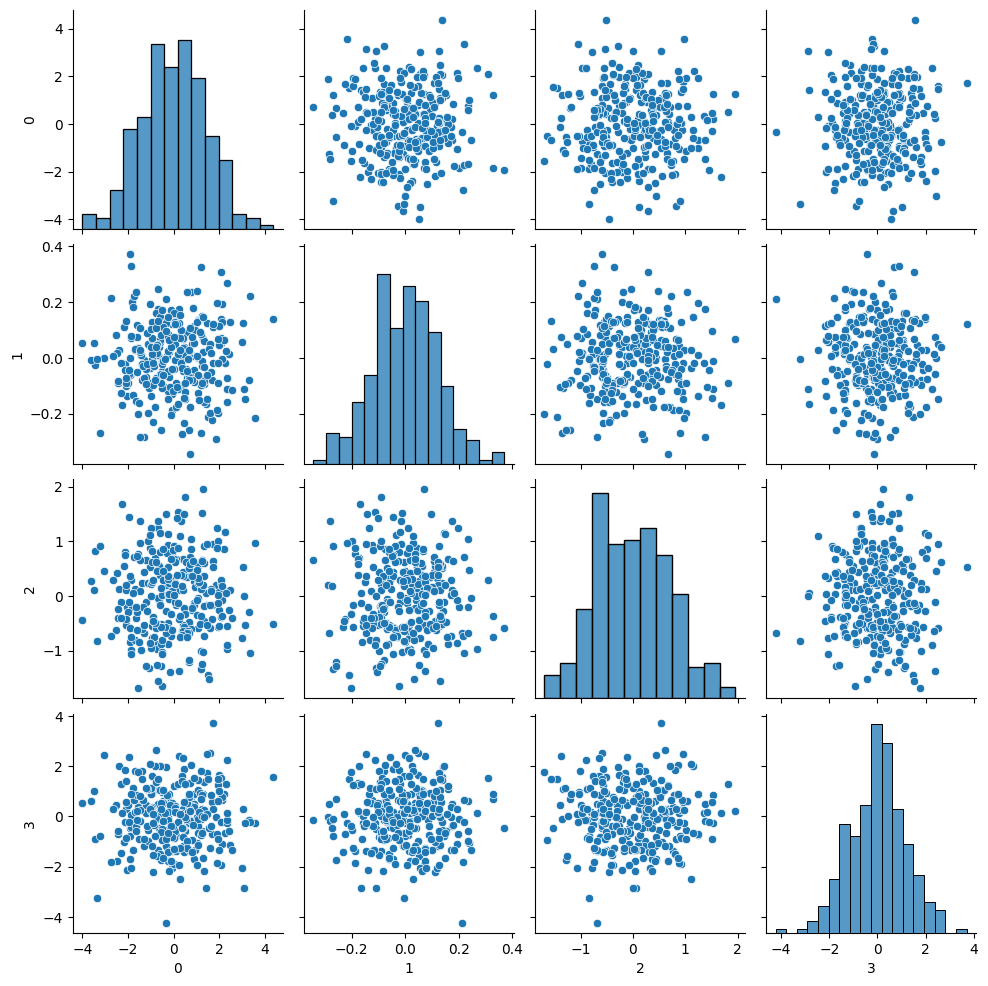

In [17]:
sns.pairplot(data_projected)

# Decomposition en elements propre par la methode des puissances iterées

In [32]:
def element_propre(A, precision=10**-2):
    n= A.shape[0]
    lambdas = np.zeros((n,))
    vi = np.zeros((n,n))
    def iterate(v):
        v0 = v.copy()
        vn = (1/np.linalg.norm(A@v0))*A@v0
        while np.linalg.norm(v0-vn) > precision:
            v0 = vn
            vn = (1/np.linalg.norm(A@v0))*A@v0
        return vn
   
    v0 = np.ones((n,))
    vi[:, 0] = iterate(v0)
    lambdas[0] = ((A@vi[:, 0])/vi[:, 0])[0]
    for i in range(1, n):
        A = A - (lambdas[i-1]/np.linalg.norm(vi[i-1])**2)*np.outer(vi[i-1], vi[i-1])
        vi[:, i] = iterate(vi[:, i-1])
        lambdas[i] = ((A@vi[:, i])/vi[:, i])[0]
        print(lambdas[i], "found")

    return lambdas, vi
        


element_propre(corr_matrice_cr)

1.870431979624489 found


KeyboardInterrupt: 

In [30]:
vec_p

array([[-0.5224063 , -0.36206924,  0.67760196,  0.36993663],
       [-0.64881643,  0.71076979,  0.02719112, -0.27037786],
       [ 0.47328978,  0.23962009,  0.72905329, -0.43250467],
       [ 0.28657579,  0.55343869,  0.09272279,  0.77651943]])